In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='Set2')

# Saved Bets analytics

In [148]:
df = pd.read_csv('bets.csv', sep=';')
print('Total count:', len(df))
df.head(5)

Total count: 122


,id,date,league,ht,at,type,name,point,price,prob,status
0,1,2021-08-09,Allsvenskan - Sweden,IFK Norrkoping,Kalmar FF,h2h,IFK Norrkoping,"-0,5","2,04","0,6234",-1.0
1,2,2021-08-14,Allsvenskan - Sweden,Malmo FF,IFK Goteborg,h2h,Malmo FF,"-0,5","1,54","0,7519",-1.0
2,3,2021-08-14,Allsvenskan - Sweden,Malmo FF,IFK Goteborg,spreads,Malmo FF,"-1,5","2,62","0,5236324",-1.0
3,4,2021-08-14,Allsvenskan - Sweden,Kalmar FF,Halmstads BK,totals,Under,"2,5","1,61","0,7519346",1.0
4,10,2021-08-21,Allsvenskan - Sweden,Malmo FF,Degerfors IF,totals,Under,"3,5","1,97","0,62260354",1.0


### General per league anlytics

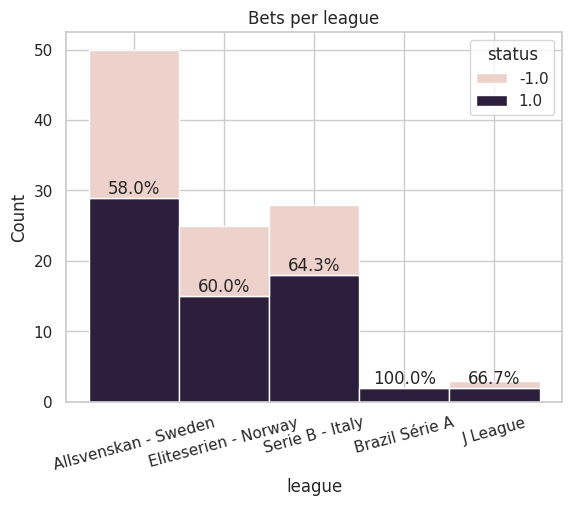

In [142]:
ax = sns.histplot(data=df, x='league', hue='status', multiple='stack', alpha=1)
labels = []
for i in range(5):
    labels.append(
        '{0:.1f}%'.format(
            100 * ax.containers[0][i].get_height() /
                 (ax.containers[0][i].get_height() + ax.containers[1][i].get_height())
        )
    )
ax.bar_label(ax.containers[0], labels=labels)
plt.xticks(rotation=15)
plt.title('Bets per league')
plt.show()

More detailed on Italy, as it has highest percentage

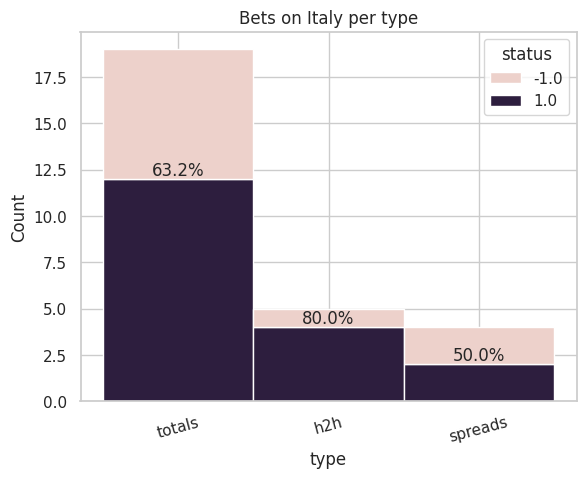

In [149]:
on_italy = df[df.league == 'Serie B - Italy']
ax = sns.histplot(data=on_italy, x='type', hue='status', multiple='stack', alpha=1)
labels = []
for i in range(3):
    labels.append(
        '{0:.1f}%'.format(
            100 * ax.containers[0][i].get_height() /
                 (ax.containers[0][i].get_height() + ax.containers[1][i].get_height())
        )
    )
ax.bar_label(ax.containers[0], labels=labels)
plt.xticks(rotation=15)
plt.title('Bets on Italy per type')
plt.show()

And on Sweden, because it has a lot of bets

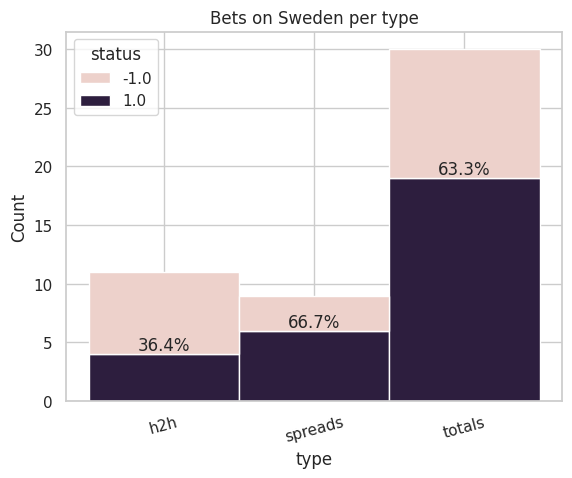

In [151]:
on_italy = df[df.league == 'Allsvenskan - Sweden']
ax = sns.histplot(data=on_italy, x='type', hue='status', multiple='stack', alpha=1)
labels = []
for i in range(3):
    labels.append(
        '{0:.1f}%'.format(
            100 * ax.containers[0][i].get_height() /
                 (ax.containers[0][i].get_height() + ax.containers[1][i].get_height())
        )
    )
ax.bar_label(ax.containers[0], labels=labels)
plt.xticks(rotation=15)
plt.title('Bets on Sweden per type')
plt.show()

### General per type analytics

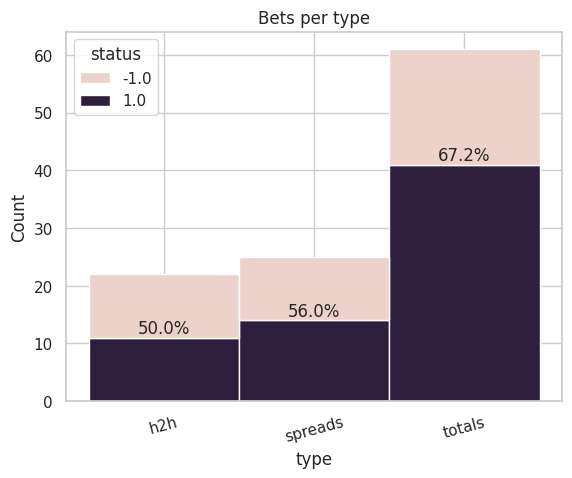

In [152]:
ax = sns.histplot(data=df, x='type', hue='status', multiple='stack', alpha=1)
labels = []
for i in range(3):
    labels.append(
        '{0:.1f}%'.format(
            100 * ax.containers[0][i].get_height() /
                 (ax.containers[0][i].get_height() + ax.containers[1][i].get_height())
        )
    )
ax.bar_label(ax.containers[0], labels=labels)
plt.xticks(rotation=15)
plt.title('Bets per type')
plt.show()

More detailed on total

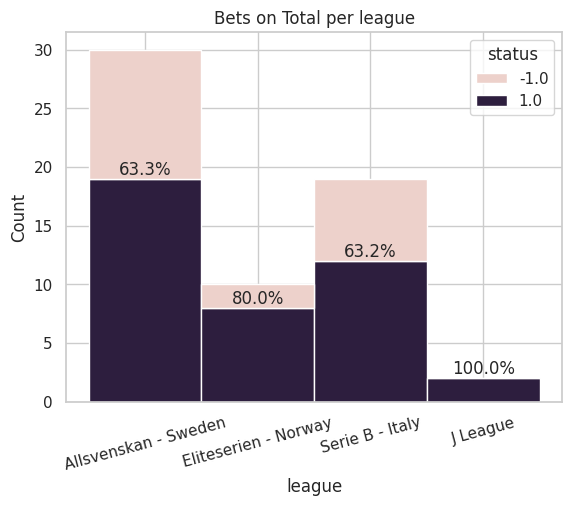

In [154]:
on_total = df[df.type == 'totals']
ax = sns.histplot(data=on_total, x='league', hue='status', multiple='stack', alpha=1)
labels = []
for i in range(4):
    labels.append(
        '{0:.1f}%'.format(
            100 * ax.containers[0][i].get_height() /
                 (ax.containers[0][i].get_height() + ax.containers[1][i].get_height())
        )
    )
ax.bar_label(ax.containers[0], labels=labels)
plt.xticks(rotation=15)
plt.title('Bets on Total per league')
plt.show()

Take a look on every (league, type) 

In [202]:
print('Count:')
pd.pivot_table(df, values='status', index=['league'], columns=['type'], aggfunc='count')

Count:


type,h2h,spreads,totals
league,,,
Allsvenskan - Sweden,11.0,9.0,30.0
Brazil Série A,NaN,2.0,NaN
Eliteserien - Norway,6.0,9.0,10.0
J League,NaN,1.0,2.0
Serie B - Italy,5.0,4.0,19.0


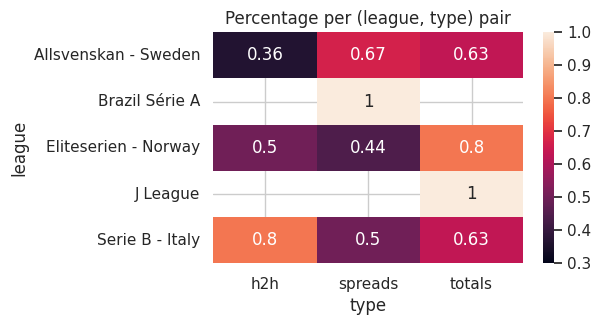

In [216]:
pi = pd.pivot_table(df, values='status', index=['league'], columns=['type'],
               aggfunc=lambda x: x.value_counts(normalize=True).get(key = 1.0)
              )

plt.figure(figsize=(5,3))
sns.heatmap(pi, annot=True, vmin=0.3, vmax=1)
plt.title('Percentage per (league, type) pair')
plt.show()

Выводы: тоталы в целом идут лучше других ставок, особенно радует (Norway, totals) с 10 элементами и 8 успехами (но это все равно маленькая выборка). Пугают (Sweden, h2h) и (Norway, Spreads) с такой же выборкой и очень низким процентом.